## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [14]:
import warnings

import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.regressionplots import plot_leverage_resid2

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

In [4]:
king_county = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv"
)

<IPython.core.display.Javascript object>

In [5]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<IPython.core.display.Javascript object>

We'll start by filtering out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, and waterfront.

In [6]:
# answer below:
king_county = king_county[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']]


<IPython.core.display.Javascript object>

Next create a pair plot in Seaborn to see the relationships between your features.

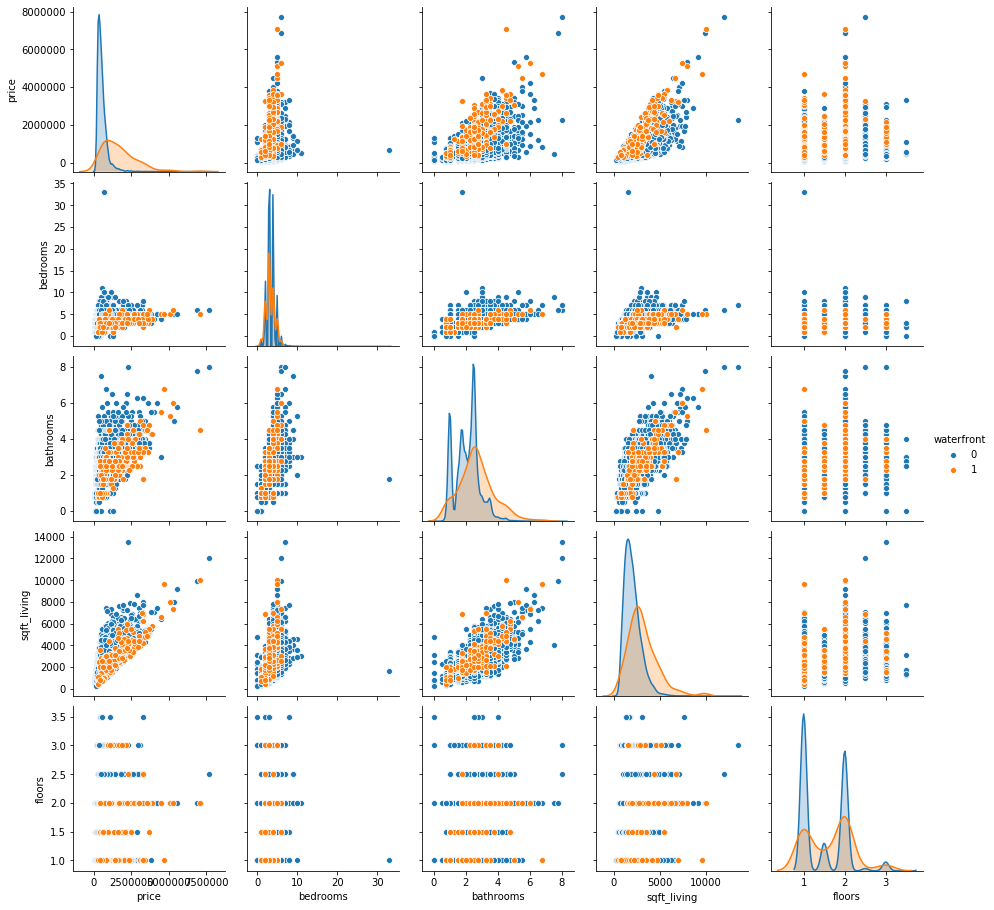

<IPython.core.display.Javascript object>

In [7]:
# answer below:
sns.pairplot(king_county, hue='waterfront')
# resid vs x's to id outliers
# levergare plot

There are two noticeable outliers here that will cause problems. Remove them.

In [8]:
# answer below:
king_county["bedrooms"].sort_values()
# index = 15870
king_county["sqft_living"].sort_values()
# index = 12777

19452      290
15381      370
860        380
18379      384
4868       390
         ...  
8092      9640
9254      9890
3914     10040
7252     12050
12777    13540
Name: sqft_living, Length: 21613, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
king_county.drop(index=[15870, 12777], axis=0, inplace=True)

<IPython.core.display.Javascript object>

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [10]:
# answer below:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21611 non-null  float64
 1   bedrooms     21611 non-null  int64  
 2   bathrooms    21611 non-null  float64
 3   sqft_living  21611 non-null  int64  
 4   floors       21611 non-null  float64
 5   waterfront   21611 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


<IPython.core.display.Javascript object>

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [11]:
# answer below:
X = king_county.drop(columns='price')
y = king_county['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


<IPython.core.display.Javascript object>

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [12]:
#answer below:

#multicolinearity
print_vif(X_train)


VIF results
-------------------------------
const          19.838836
bedrooms        1.607136
bathrooms       2.806043
sqft_living     2.671763
floors          1.351352
waterfront      1.017648
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

In [13]:
# homoscedasticity
_, p, _, _ = het_breuschpagan(model.resid, X_train_const)
p

NameError: name 'model' is not defined

<IPython.core.display.Javascript object>

In [ ]:
plt.scatter(model.resid, model.predict(X_train_const), alpha=0.5)

In [ ]:
plt.scatter(y_train, model.resid)

In [ ]:
# normality of errors
sm.qqplot(model.resid, line="s")
plt.show()

In [ ]:
plt.hist(model)

Create your final linear model and produce a model summary. Look at the coefficients and interpret their meaning. How do each of them influence the final prediction?

In [ ]:
# answer below
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()
model.summary()

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE. How accurate is our model?

In [ ]:
# answer below:
y_pred = model.predict(X_test_const)
plt.scatter(y_test, y_pred)

In [ ]:
# MAE
errors = y_pred - y_test
np.mean(np.abs(errors))

In [ ]:
# MSE
np.mean(errors ** 2)

In [ ]:
# rmse
np.sqrt(np.mean(errors ** 2))

In [ ]:
# MASE
percent_error = errors / y_test
np.mean(np.abs(percent_error))